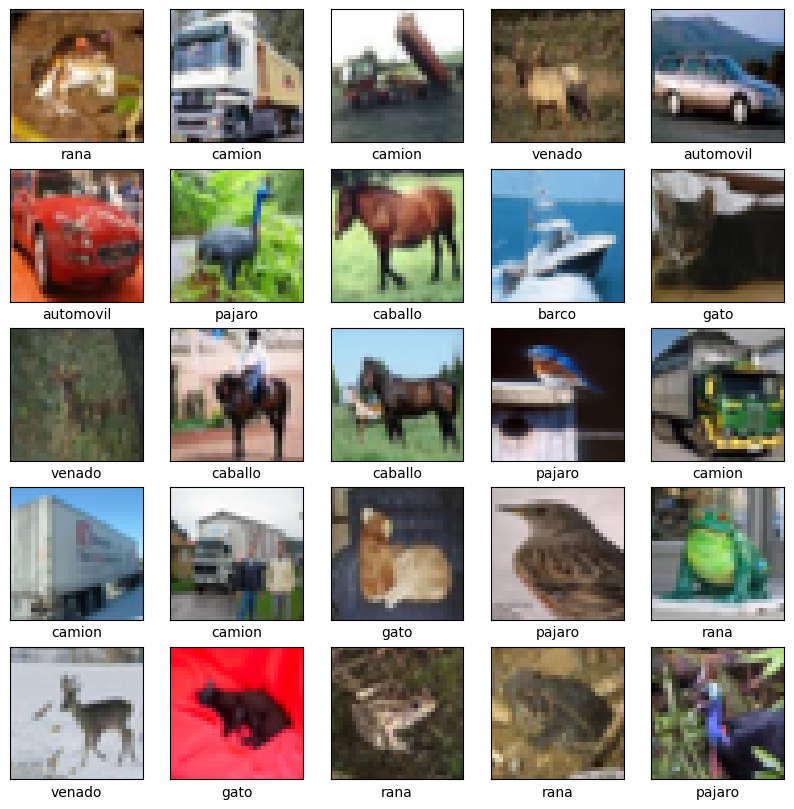

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 batch_normalization_19 (Ba  (None, 28, 28, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                      


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 25s 14ms/step - loss: 1.6614 - accuracy: 0.4252 - val_loss: 1.4600 - val_accuracy: 0.5021 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0675 - accuracy: 0.6310 - val_loss: 1.2297 - val_accuracy: 0.6044 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8100 - accuracy: 0.7189 - val_loss: 0.7840 - val_accuracy: 0.7308 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6474 - accuracy: 0.7771 - val_loss: 0.7013 - val_accuracy: 0.7579 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5113 - accuracy: 0.

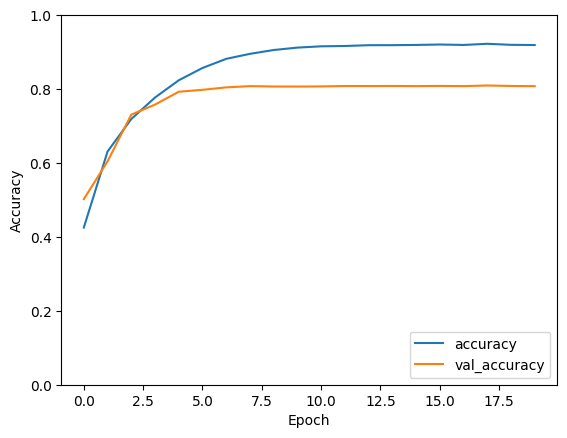

313/313 - 1s - loss: 0.6934 - accuracy: 0.8078 - 1s/epoch - 4ms/step
Test accuracy: 0.8077999949455261
2/2 [==============================] - 0s 6ms/step


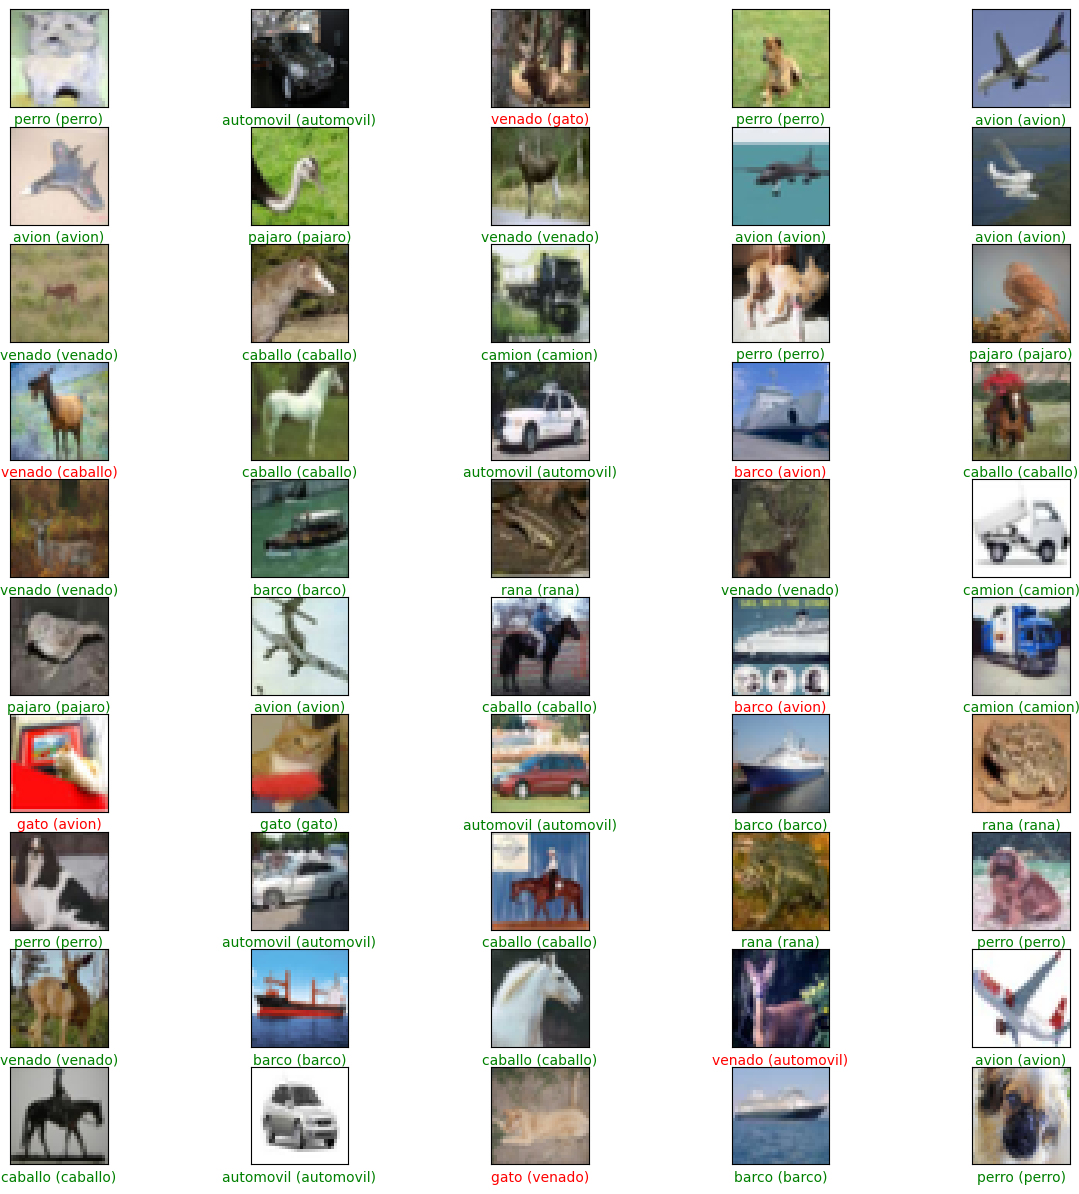

In [4]:
# INGENIERIA DEL CONOCIMIENTO.:
#   EQUIPO:
#     ALVAREZ MELO ANGEL JAFET, MENESES PEREZ VANESSA, ZAMORA MENESES REYNA SAMANTHA.
#
#   PROYECTO FINAL: Clasificar  imágenes
# ***************************************************************************
# Importar librerías y cargar datos


# Importar librerías necesarias
import math  # Biblioteca para funciones matemáticas
import tensorflow as tf  # Biblioteca principal para el aprendizaje profundo
from tensorflow.keras import datasets, layers, models  # Módulos específicos de Keras para datasets, capas y modelos
import matplotlib.pyplot as plt  # Biblioteca para visualización de datos
import numpy as np  # Biblioteca para operaciones numéricas

# Cargar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  # Cargar imágenes y etiquetas de entrenamiento y prueba

# Normalización de los valores de los píxeles a un rango de 0 a 1
train_images = train_images / 255.0  # Dividir los valores de los píxeles de las imágenes de entrenamiento entre 255
test_images = test_images / 255.0  # Dividir los valores de los píxeles de las imágenes de prueba entre 255

# Definición de los nombres de las clases
class_names = ['avion', 'automovil', 'pajaro', 'gato', 'venado',
               'perro', 'rana', 'caballo', 'barco', 'camion']  # Lista de nombres de las clases en CIFAR-10

# Visualización de ejemplos de imágenes de entrenamiento
plt.figure(figsize=(10, 10))  # Crear una figura de 10x10 pulgadas
for i in range(25):  # Mostrar las primeras 25 imágenes
    plt.subplot(5, 5, i + 1)  # Crear una cuadrícula de 5x5
    plt.xticks([])  # Eliminar las marcas en el eje x
    plt.yticks([])  # Eliminar las marcas en el eje y
    plt.grid(False)  # Eliminar la cuadrícula
    plt.imshow(train_images[i])  # Mostrar la imagen
    plt.xlabel(class_names[train_labels[i][0]])  # Etiquetar la imagen con su clase
plt.show()  # Mostrar la figura

# Definición de la arquitectura del modelo
model = models.Sequential([  # Crear un modelo secuencial
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Primera capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Conv2D(128, (3, 3), activation='relu'),  # Segunda capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.MaxPooling2D((2, 2)),  # Capa de max-pooling con ventana de 2x2
    layers.Conv2D(128, (3, 3), activation='relu'),  # Tercera capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Conv2D(128, (3, 3), activation='relu'),  # Cuarta capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.MaxPooling2D((2, 2)),  # Segunda capa de max-pooling con ventana de 2x2
    layers.Conv2D(128, (3, 3), activation='relu'),  # Quinta capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Conv2D(128, (3, 3), activation='relu'),  # Sexta capa de convolución con 128 filtros de 3x3
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Flatten(),  # Aplanar el tensor de entrada
    layers.Dense(1024, activation='relu'),  # Capa completamente conectada con 1024 neuronas
    layers.Dropout(0.5),  # Capa de dropout con 50% de probabilidad de desactivación
    layers.Dense(10, activation='softmax')  # Capa de salida con activación softmax para 10 clases
])

# Mostrar un resumen del modelo
model.summary()  # Imprimir un resumen de la arquitectura del modelo

# Función de decaimiento del learning rate
def lr_decay(epoch):  # Definir una función que ajuste el learning rate basado en la época
    return 0.01 * math.pow(0.6, epoch)  # Decrecimiento exponencial del learning rate

# Callback para el schedule del learning rate
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)  # Crear un callback para ajustar el learning rate durante el entrenamiento

# Definición del optimizador
optimizer2 = tf.keras.optimizers.Adam(lr=0.001)  # Crear un optimizador Adam con un learning rate inicial de 0.001

# Compilación del modelo
model.compile(optimizer=optimizer2,  # Usar el optimizador Adam
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Usar la pérdida de entropía cruzada
              metrics=['accuracy'])  # Evaluar el modelo con la métrica de precisión

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=20,  # Ajustar el modelo a los datos de entrenamiento durante 20 épocas
                    validation_data=(test_images, test_labels),  # Validar el modelo con los datos de prueba
                    callbacks=[lr_decay_callback])  # Usar el callback para ajustar el learning rate

# Visualización de la precisión del modelo
plt.plot(history.history['accuracy'], label='accuracy')  # Graficar la precisión en entrenamiento
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Graficar la precisión en validación
plt.xlabel('Epoch')  # Etiqueta del eje x
plt.ylabel('Accuracy')  # Etiqueta del eje y
plt.ylim([0, 1])  # Limitar el eje y de 0 a 1
plt.legend(loc='lower right')  # Colocar la leyenda en la esquina inferior derecha
plt.show()  # Mostrar la figura

# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  # Evaluar el modelo en los datos de prueba y obtener la pérdida y precisión
print(f'Test accuracy: {test_acc}')  # Imprimir la precisión en el conjunto de prueba

# Selección aleatoria de 50 imágenes de prueba
random_indices = np.random.choice(test_images.shape[0], size=50, replace=False)  # Seleccionar 50 índices aleatorios sin reemplazo
test_images_sample = test_images[random_indices]  # Obtener las imágenes de prueba correspondientes a los índices seleccionados
test_labels_sample = test_labels[random_indices]  # Obtener las etiquetas de prueba correspondientes a los índices seleccionados

# Realizar predicciones en las imágenes seleccionadas
predictions = model.predict(test_images_sample)  # Predecir las clases para las imágenes seleccionadas

# Visualización de los resultados de las predicciones
plt.figure(figsize=(15, 15))  # Crear una figura de 15x15 pulgadas
for i in range(50):  # Mostrar las 50 imágenes seleccionadas
    plt.subplot(10, 5, i + 1)  # Crear una cuadrícula de 10x5
    plt.xticks([])  # Eliminar las marcas en el eje x
    plt.yticks([])  # Eliminar las marcas en el eje y
    plt.grid(False)  # Eliminar la cuadrícula
    plt.imshow(test_images_sample[i])  # Mostrar la imagen
    predicted_label = class_names[np.argmax(predictions[i])]  # Obtener la etiqueta predicha
    true_label = class_names[test_labels_sample[i][0]]  # Obtener la etiqueta verdadera
    color = 'green' if predicted_label == true_label else 'red'  # Color verde si la predicción es correcta, rojo si no
    plt.xlabel(f"{true_label} ({predicted_label})", color=color)  # Etiquetar la imagen con la predicción y la etiqueta verdadera
plt.show()  # Mostrar la figura